In [32]:
import numpy as np

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

In [34]:
df = pd.read_csv("C:/Raj/all ml/Python/nuevo_projecto/dataset/crx.data")

In [35]:
header = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P']
df = pd.read_csv("C:/Raj/all ml/Python/nuevo_projecto/dataset/crx.data", names = header)

In [36]:
df

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [37]:
df.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       690 non-null    object 
 1   B       690 non-null    object 
 2   C       690 non-null    float64
 3   D       690 non-null    object 
 4   E       690 non-null    object 
 5   F       690 non-null    object 
 6   G       690 non-null    object 
 7   H       690 non-null    float64
 8   I       690 non-null    object 
 9   J       690 non-null    object 
 10  K       690 non-null    int64  
 11  L       690 non-null    object 
 12  M       690 non-null    object 
 13  N       690 non-null    object 
 14  O       690 non-null    int64  
 15  P       690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [39]:
df.describe()

,C,H,K,O
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [40]:
# let's check the unique values in each column
for i in df.columns:
    if df[i].dtype == object:
        print(df[i].unique())

['b' 'a' '?']
['30.83' '58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42'
 '42.50' '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25'
 '21.83' '19.17' '25.00' '47.75' '27.42' '41.17' '15.83' '47.00' '56.58'
 '57.42' '42.08' '29.25' '42.00' '49.50' '36.75' '22.58' '27.25' '23.00'
 '27.75' '54.58' '34.17' '28.92' '29.67' '39.58' '56.42' '54.33' '41.00'
 '31.92' '41.50' '23.92' '25.75' '26.00' '37.42' '34.92' '34.25' '23.33'
 '23.17' '44.33' '35.17' '43.25' '56.75' '31.67' '23.42' '20.42' '26.67'
 '36.00' '25.50' '19.42' '32.33' '34.83' '38.58' '44.25' '44.83' '20.67'
 '34.08' '21.67' '21.50' '49.58' '27.67' '39.83' '?' '37.17' '25.67'
 '34.00' '49.00' '62.50' '31.42' '52.33' '28.75' '28.58' '22.50' '28.50'
 '37.50' '35.25' '18.67' '54.83' '40.92' '19.75' '29.17' '24.58' '33.75'
 '25.42' '37.75' '52.50' '57.83' '20.75' '39.92' '24.75' '44.17' '23.50'
 '47.67' '22.75' '34.42' '28.42' '67.75' '47.42' '36.25' '32.67' '48.58'
 '33.58' '18.83' '26.92' '31.25' '56.50' 

In [41]:
df = df.replace("?",np.nan)
df

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [42]:
for i in df.columns:
    if df[i].dtype == object:
        print(df[i].unique())

['b' 'a' nan]
['30.83' '58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42'
 '42.50' '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25'
 '21.83' '19.17' '25.00' '47.75' '27.42' '41.17' '15.83' '47.00' '56.58'
 '57.42' '42.08' '29.25' '42.00' '49.50' '36.75' '22.58' '27.25' '23.00'
 '27.75' '54.58' '34.17' '28.92' '29.67' '39.58' '56.42' '54.33' '41.00'
 '31.92' '41.50' '23.92' '25.75' '26.00' '37.42' '34.92' '34.25' '23.33'
 '23.17' '44.33' '35.17' '43.25' '56.75' '31.67' '23.42' '20.42' '26.67'
 '36.00' '25.50' '19.42' '32.33' '34.83' '38.58' '44.25' '44.83' '20.67'
 '34.08' '21.67' '21.50' '49.58' '27.67' '39.83' nan '37.17' '25.67'
 '34.00' '49.00' '62.50' '31.42' '52.33' '28.75' '28.58' '22.50' '28.50'
 '37.50' '35.25' '18.67' '54.83' '40.92' '19.75' '29.17' '24.58' '33.75'
 '25.42' '37.75' '52.50' '57.83' '20.75' '39.92' '24.75' '44.17' '23.50'
 '47.67' '22.75' '34.42' '28.42' '67.75' '47.42' '36.25' '32.67' '48.58'
 '33.58' '18.83' '26.92' '31.25' '56.50' 

In [43]:
df.isnull().sum()

A    12
B    12
C     0
D     6
E     6
F     9
G     9
H     0
I     0
J     0
K     0
L     0
M     0
N    13
O     0
P     0
dtype: int64

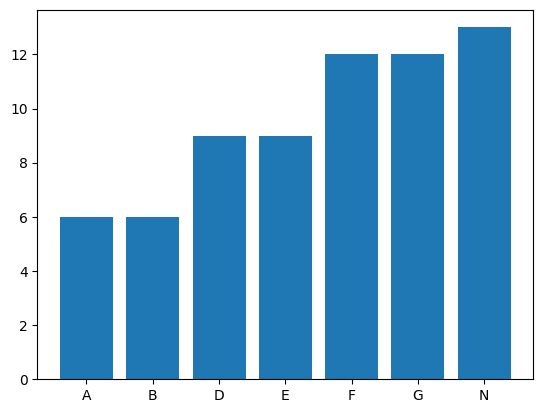

In [44]:
r = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P']
c = [12,12,0,6,6,9,9,0,0,0,0,0,0,13,0,0]

r_filt = []
c_filt = []

for i in range(len(r)):
    if c[i] != 0:
        r_filt.append(r[i])
        c_filt.append(c[i])

r_filt.sort()
c_filt.sort()

plt.bar(r_filt,c_filt)
plt.show()


In [45]:
def fix_missing_mean(df,col):
    df[col] = pd.to_numeric(df[col], errors = "coerce")
    df[col].fillna(df[col].mean())

def fix_missing_ffill(df,col):
    df[col] = df[col].fillna(method = "ffill")

In [46]:
fix_missing_ffill(df,'A')
fix_missing_ffill(df,'B')
fix_missing_ffill(df,'D')
fix_missing_ffill(df,'E')
fix_missing_ffill(df,'F')
fix_missing_ffill(df,'G')
fix_missing_mean(df,'N')


C:\Users\HP\AppData\Local\Temp\ipykernel_9244\1226868172.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[col] = df[col].fillna(method = "ffill")


In [54]:
Y = df['P']
features = df.drop(['P'], axis = 1)
features.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0


In [55]:
from pandas import DataFrame as DF

In [58]:
tar = DF(Y)
tar.head()

,P
0,+
1,+
2,+
3,+
4,+


In [52]:
from sklearn.preprocessing import OrdinalEncoder as OE

In [59]:
object_columns = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N']
X = features.copy()
X[object_columns] = OE().fit_transform(features[object_columns])

Y_enc = OE().fit_transform(tar)
# now Y_enc represents the target feature in numerically encoded form
X.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O
0,1.0,156.0,0.0,1.0,0.0,12.0,7.0,30.0,1.0,1.0,1.0,0.0,0.0,68.0,0
1,0.0,328.0,93.0,1.0,0.0,10.0,3.0,65.0,1.0,1.0,6.0,0.0,0.0,11.0,560
2,0.0,89.0,16.0,1.0,0.0,10.0,3.0,36.0,1.0,0.0,0.0,0.0,0.0,96.0,824
3,1.0,125.0,46.0,1.0,0.0,12.0,7.0,73.0,1.0,1.0,5.0,1.0,0.0,31.0,3
4,1.0,43.0,109.0,1.0,0.0,12.0,7.0,41.0,1.0,0.0,0.0,0.0,2.0,37.0,0


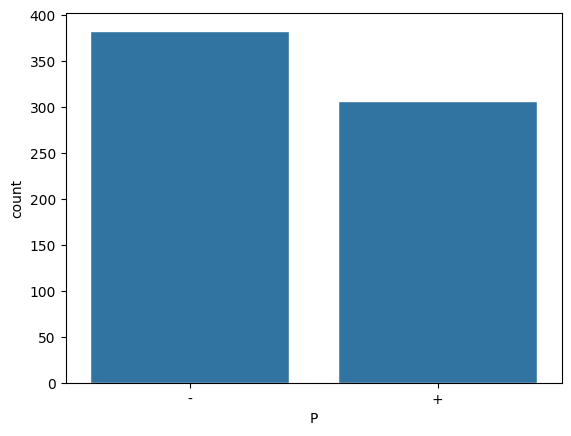

In [ ]:
# fig, ax = plt.subplots(1, 1, figsize=(7,5), sharex = True)
sns.countplot(data = df, x = 'P',edgecolor = "white", order = df['P'].value_counts().index)
# total = df['P'].value_counts().sum()
plt.show()

In [60]:
from sklearn.model_selection import  train_test_split as tts

In [61]:
X_train, X_test, Y_train, Y_test = tts(X, Y_enc, test_size = 0.30, random_state = 3, shuffle = True)

#### we want to use Extreme Gradient Boosting to find out the accuracy on the training and test set.


In [ ]:
from xgboost import XGBClassifier as xc

In [62]:
model = xc()
model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [63]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test) 

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
train_acc = accuracy_score(Y_train, train_pred)
test_acc = accuracy_score(Y_test, test_pred)

In [66]:
print("Train Score : ", train_acc)
print("Test Score : ", test_acc)

Train Score :  1.0
Test Score :  0.8260869565217391
